### DATA MINING FOR BUSINESS INTELLIGENCE

### OBJECTIVE :

We intend to find out which particular features are most significant in the observed cluster memberships
obtained in our Unsupervised Learning Project.

### APPROACH :

For Each Feature :
1. Obtain the array of values current feature
2. Using the feature as independent , and cluster memberships as dependent variable, create test train splits
3. Fit logistic regression model on the training set obtained in step 2
4. Make clustering prediction using the fitted model of each feature
5. Evaluate the performance of  model corresponding to each feature using corresponding test set.
6. Rank the features in descending order of performance of their corresponding model
7. Visualize the performance of each feature for cluster predictions
8. Conclude

## Step 1 . :  Import all the relevant Libraries

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')


### Step 2 : Merge the cluster predictions from kmeans algorithm used in unsupervised learning,
###               Read the file with cluster assignments


In [274]:
data = pd.read_csv('clustered_data.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,ClusterNumber
0,15.0,8,350.0,165.0,3693,11.5,70,1,0
1,18.0,8,318.0,150.0,3436,11.0,70,1,0
2,16.0,8,304.0,150.0,3433,12.0,70,1,0
3,17.0,8,302.0,140.0,3449,10.5,70,1,0
4,15.0,8,429.0,198.0,4341,10.0,70,1,0


### Step 3 : Scale the data to compensate for differences in range of independent variables

In [275]:
x_sc = data.iloc[:,:8].copy()
scaler = StandardScaler()
x_sc = scaler.fit_transform(x_sc)

# Since data is now converted to array, convert it back to dataframe with scaled features
# to work with plots and other analysis later
cols = list(data.columns.values)
vals = [x_sc[:,i] for i in range(x_sc.shape[1])]
scaled_df = pd.DataFrame(dict(zip(cols,vals)))
scaled_df['ClusterNumber'] = data['ClusterNumber']
data = scaled_df
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,ClusterNumber
0,-1.091843,1.504336,1.506627,1.591462,0.855275,-1.481575,-1.634937,-0.716507,0
1,-0.707773,1.504336,1.199270,1.199730,0.551642,-1.663271,-1.634937,-0.716507,0
2,-0.963820,1.504336,1.064801,1.199730,0.548098,-1.299879,-1.634937,-0.716507,0
3,-0.835796,1.504336,1.045591,0.938576,0.567001,-1.844967,-1.634937,-0.716507,0
4,-1.091843,1.504336,2.265414,2.453271,1.620855,-2.026662,-1.634937,-0.716507,0


### Step 3 : Extract each feature into a list to train it for Cluster predictions

In [276]:
features = []
Y = data['ClusterNumber']

for i in range(8):
    nxt_feature = data.iloc[:,i:i+1].values
    features.append(nxt_feature)

### Step 4 : Fit Logistic Regression classification algorithm on each feature against cluster memberships

1. Take a feature (column)
2. Split the selected feature(X)and prediction column(Y) into training and testing sets
3. Train a Logistic Regression model with feature as independent variable and Cluster membership as dependent
   for each feature
4. Compute and store the performance of each model


In [277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

col_names = list(data.columns)[:-1]
ftr_accuracy_map = {}
ftr_cm_map = {}
for ftr_num,nxt_feature in enumerate(features):
    print('\n-------------------------\nFEATURE : '+col_names[ftr_num]+'\n-------------------------\n')
    X_train, X_test, Y_train, Y_test = train_test_split(nxt_feature,Y,test_size=3/20,random_state=0)
    print('Fitting Feature \''+col_names[ftr_num]+'\' against cluster assignments.....')
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    cm= confusion_matrix(Y_test, Y_pred)
    model_acc = accuracy_score(Y_test, Y_pred)
    precision_sc = precision_score(Y_test,Y_pred)
    recall_sc = recall_score(Y_test, Y_pred)
    
    print('Cluster Prediction Accuracy using '+col_names[ftr_num]+' : '+str(round(model_acc,3)) )
    cm= confusion_matrix(Y_test, Y_pred)
    model_acc = round(accuracy_score(Y_test, Y_pred),3)
    precision_sc = round(precision_score(Y_test,Y_pred),3)
    recall_sc = round(recall_score(Y_test, Y_pred),3)
    ftr_accuracy_map[col_names[ftr_num]] = model_acc
    ftr_cm_map[col_names[ftr_num]] = cm


-------------------------
FEATURE : mpg
-------------------------

Fitting Feature 'mpg' against cluster assignments.....
Cluster Prediction Accuracy using mpg : 0.867

-------------------------
FEATURE : cylinders
-------------------------

Fitting Feature 'cylinders' against cluster assignments.....
Cluster Prediction Accuracy using cylinders : 0.833

-------------------------
FEATURE : displacement
-------------------------

Fitting Feature 'displacement' against cluster assignments.....
Cluster Prediction Accuracy using displacement : 0.95

-------------------------
FEATURE : horsepower
-------------------------

Fitting Feature 'horsepower' against cluster assignments.....
Cluster Prediction Accuracy using horsepower : 0.817

-------------------------
FEATURE : weight
-------------------------

Fitting Feature 'weight' against cluster assignments.....
Cluster Prediction Accuracy using weight : 1.0

-------------------------
FEATURE : acceleration
-------------------------

Fittin

### Step 5 : Rank performance of each feature in predicting the cluster memberships in descending order

In [278]:
print('\n\n\n--------------------------------------------------\
       \nCLUSTERING PREDICTION ACCURACY  OF FEATURES :\
       \n--------------------------------------------------\n')
sorted_performance = dict(sorted(ftr_accuracy_map.items() , key = lambda x : x[1], reverse=True))
for feature,perf in sorted_performance.items():
    print(f"{feature.upper():<20}{perf:10}")
    
print('--------------------------------------------------\n\n')




--------------------------------------------------       
CLUSTERING PREDICTION ACCURACY  OF FEATURES :       
--------------------------------------------------

WEIGHT                     1.0
DISPLACEMENT              0.95
MPG                      0.867
CYLINDERS                0.833
HORSEPOWER               0.817
ORIGIN                   0.717
ACCELERATION               0.7
MODEL_YEAR               0.633
--------------------------------------------------




### Step 6 : Plot Feature Name vs Accuracy for each feature

This gives an visual insight into clustering predictions of each feature


  -------------------------------------------------------------------------------------



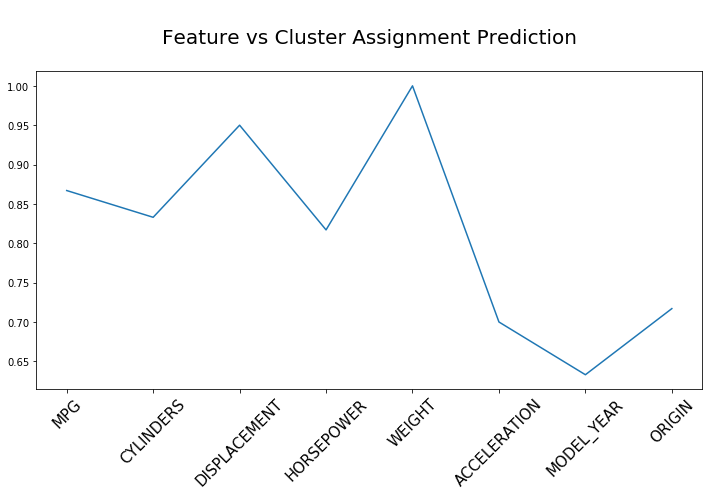

In [279]:
print('\n  -------------------------------------------------------------------------------------\n')

fig, ax = plt.subplots(figsize=(10,7))
im = ax.plot(ftr_accuracy_map.keys() , ftr_accuracy_map.values())
# Loop over data dimensions and create text annotations.

ax.set_xticks(np.arange(len(col_names)))
ax.set_xticklabels([x.upper() for x in col_names], fontsize=15, rotation=45)
ax.set_title("\nFeature vs Cluster Assignment Prediction\n", fontsize=20)
fig.tight_layout()
plt.show()
print('\n\n')

### Step 7 : VISUALIZE CONFUSION MATRIX OF THE WINNING FEATURE

Below is a visualization  of confusion matrix for the winning feature , i.e. , Weight in this case


In [281]:
ftr_cm_map['weight']

array([[20,  0],
       [ 0, 40]])

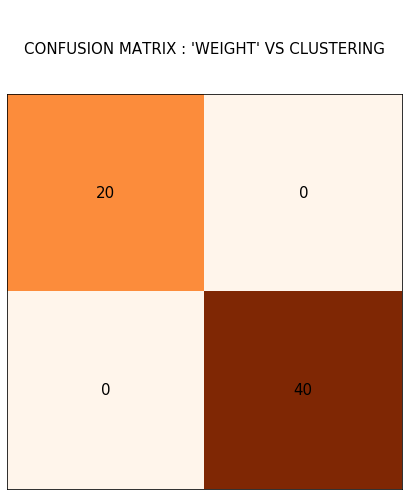

In [282]:
#Plot the matrix
cm = ftr_cm_map['weight']
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(cm,cmap='Oranges')
# Loop over data dimensions and create text annotations.
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j],
               ha="center", va="center", color="black",fontsize=15)
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
ax.set_title("\n\nCONFUSION MATRIX : \'WEIGHT\' VS CLUSTERING\n\n", fontsize=15)
fig.tight_layout()
plt.show()

### Step 8 : Conclusion

As we can see from the visual plots and ranked output of each feature vs clustering assigment prediction models,
the model trained using 'Weight' variable is 100% accurate in predicion of clusterings. The confusion matrix shows presence of zero 'False Negatives' or ' False Positives' in its predictions. This is followed by performance of
model built using 'Displacement' as the predictor of clustering.

 **Thus we can say that**
1. Weight
2. Displacemnt

are most significant features contributing to our clusterings